In [87]:
import numpy as np

from Code.Torsh.TorchMacsumAggregationLearning import *
from Code.Torsh.Torsh_data_generation import *

import csv
import pandas as pd
%load_ext autoreload


N=2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [88]:
def genere_data_bin(N,n_exemple):
    
    n= n_exemple//4
    top = np.concatenate([
        np.zeros((n ,N//2)), np.ones((n ,N//2)) ], axis=1)
    
    bot = np.concatenate([
         np.ones((n ,N//2)) ,np.zeros((n ,N//2))], axis=1)
    
    return np.concatenate([top,bot, np.zeros((n,N)),np.ones((n,N))], axis=0)
    
print(genere_data_bin(N,20))

[[0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]]


In [130]:
def genere_data_AND (N,n_exemple):
    X = genere_data_bin(N,n_exemple)
    n_exemple//=4
    zero = np.zeros((n_exemple))
    one =np.ones((n_exemple))
    return X,np.concatenate([zero,zero,zero,one], axis=0)

In [167]:
def genere_data_AND (N,n_exemple):
    X = genere_data_bin(N,n_exemple)
    n_exemple//=4
    zero = np.zeros((n_exemple))
    one =np.ones((n_exemple))
    return X,np.concatenate([zero,zero,zero,one], axis=0)

def genere_data_OU(N,n_exemple):
    X = genere_data_bin(N,n_exemple)
    n_exemple//=4
    zero = np.zeros((n_exemple))
    one =np.ones((n_exemple))
    return X,np.concatenate([zero,one,one,one], axis=0)

def genere_data_XOR(N,n_exemple):
    X = genere_data_bin(N,n_exemple)
    n_exemple//=4
    zero = np.zeros((n_exemple))
    one =np.ones((n_exemple))
    return X,np.concatenate([zero,zero,one,one], axis=0)

In [168]:
X,Y = genere_data_XOR(N,20)
print(Y)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [169]:
phi_true = np.random.uniform(low=-2.0, high=2.0, size=N) 
macsum_true = Macsum(N,phi_true)
print("True Kernel : ",phi_true)
true_metric = evaluate_model_complet(X,Y,macsum_true)

True Kernel :  [-1.6863113   1.51014414]


In [170]:
model = Macsum(N)#,alpha=0.1,gamma=0.8,k_sigmoid=0.1)
#multi = cross_validate_macsum(model_SPIL,X,Y,5,n_epochs = 3000,learning_rate=1e-3,epsilon_conv=1e-5,batch_size=256,beta1=0.8,beta2=0.99,phi_true=phi_true)
model.fit_adam(X,Y,X,Y,learning_rate=1e-3,epsilon_conv=1e-6,n_epochs = 5000,beta1=0.8,beta2=0.99,batch_size=256,phi_true_for_eval=phi_true)

Starting PyTorch Adam training (Macsum with Manual Gradient for Phi)...


Adam Training (Macsum Manual Grad):  15%|█▌        | 768/5000 [00:00<00:02, 2033.77it/s]


Convergence reached at epoch 769 (manual grad fit_adam for Macsum). Change norm: 9.67e-07


array([0.44444433, 0.66664631])

In [176]:
print(X)
print(Y)

[[0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [177]:
i=5
print(Y[i])
model.forward( torch.tensor(X[i], dtype=torch.float64)) 

0.0


(tensor(0., dtype=torch.float64), tensor(0.4444, dtype=torch.float64))

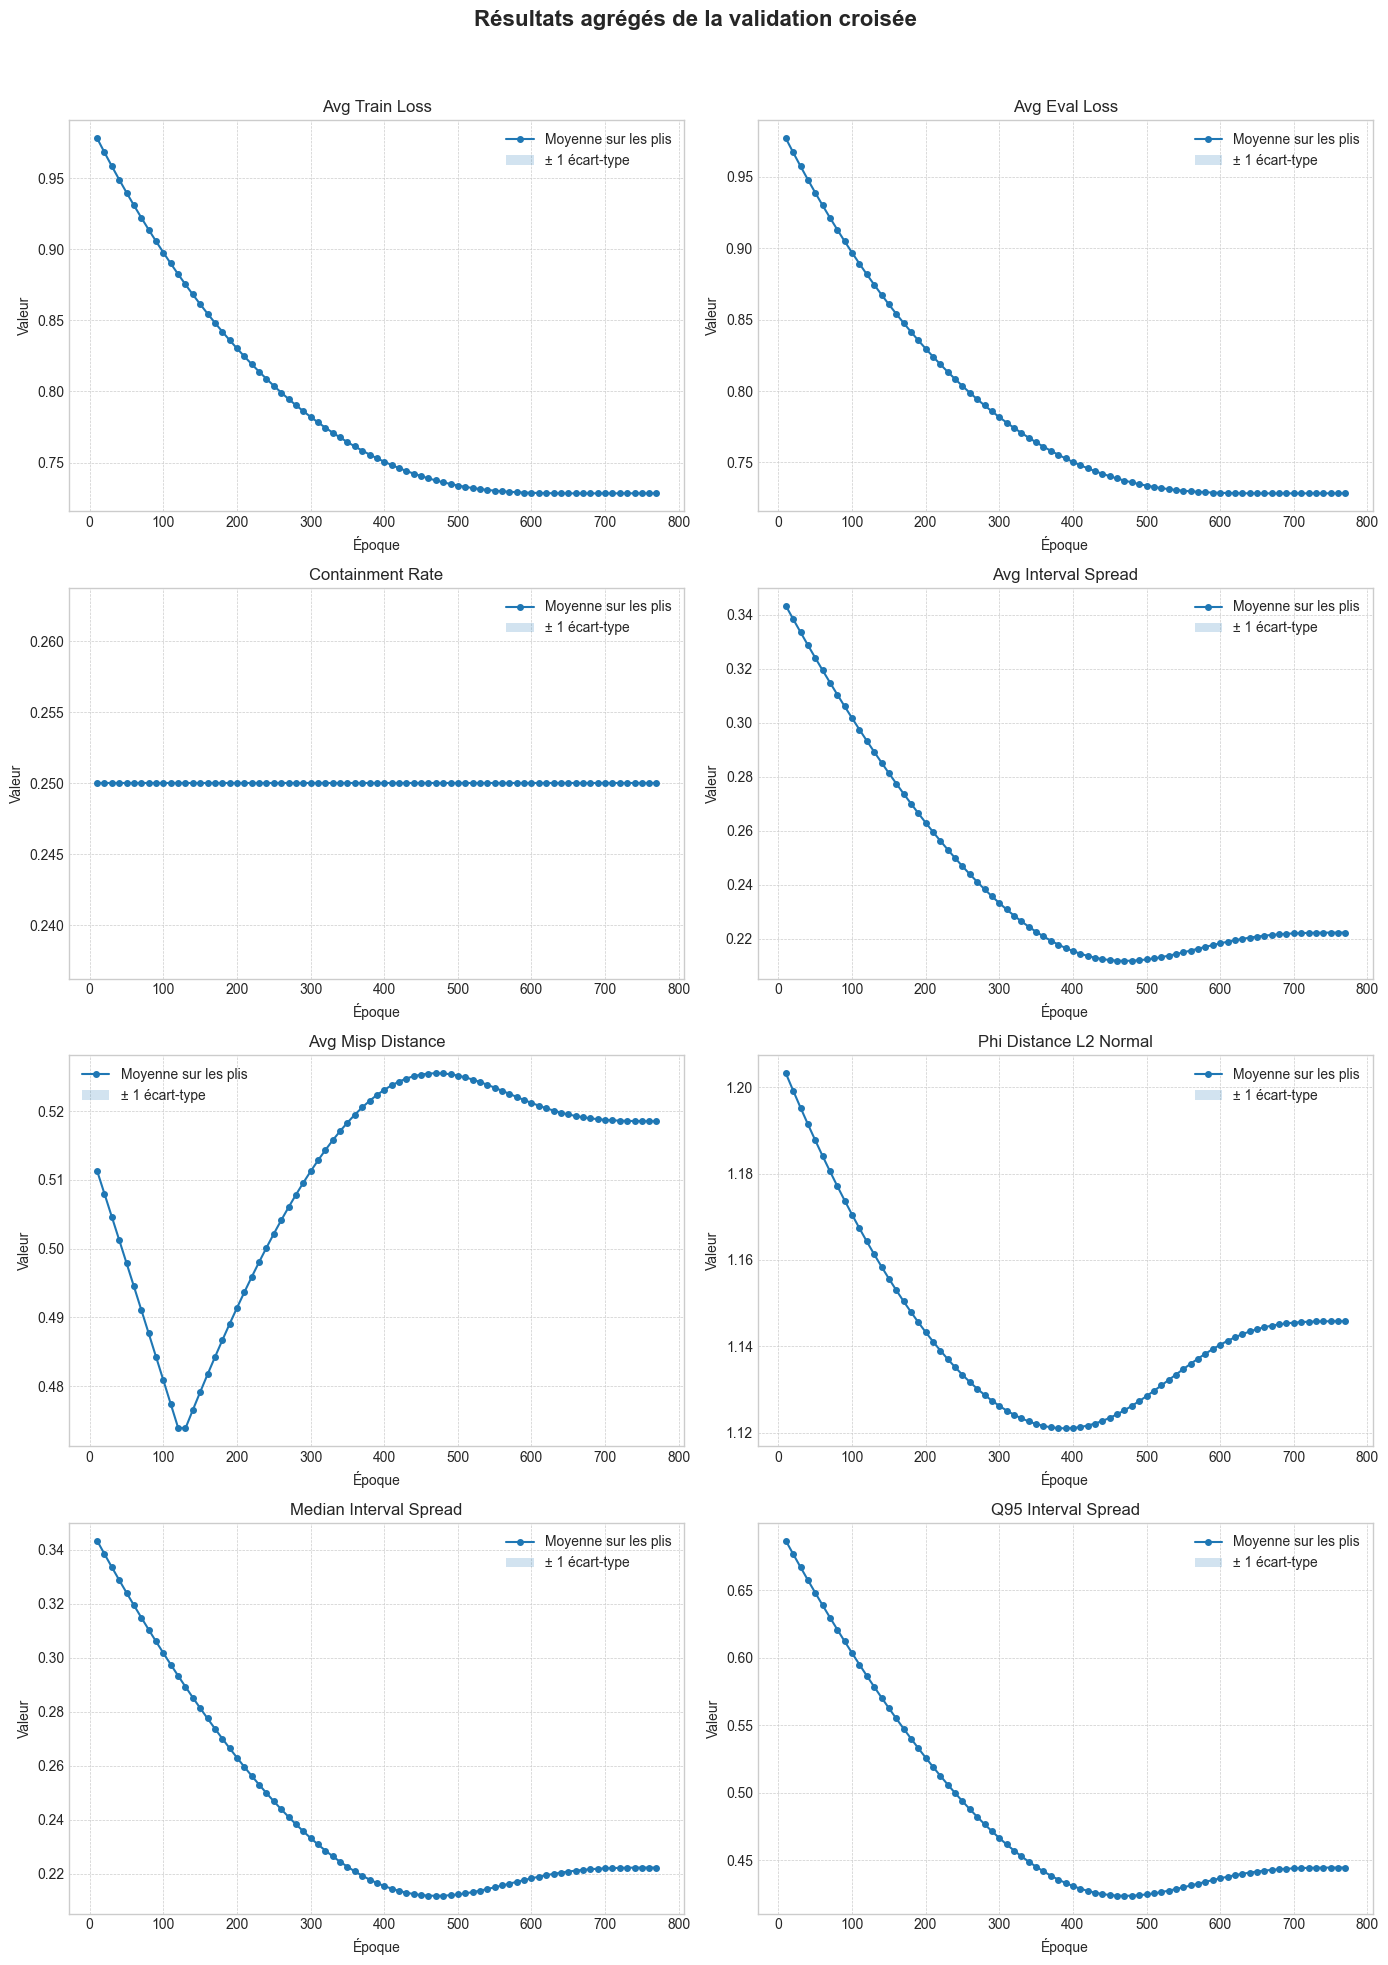

In [172]:
plot_metrics_complet([model.history,model.history,model.history])